In [9]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from ugradio import pico
from ugradio import dft

Populating the interactive namespace from numpy and matplotlib


In [10]:
# make a large array of all of the data files so I can loop through them

vSig10 = np.load('lab1_10p_1.npy')
vSig20 = np.load('lab1_20p_1.npy')
vSig30 = np.load('lab1_30p_1.npy')
vSig40 = np.load('lab1_40p_1.npy')
vSig50 = np.load('lab1_50p_1.npy')
vSig60 = np.load('lab1_60p_1.npy')
vSig70 = np.load('lab1_70p_1.npy')
vSig80 = np.load('lab1_80p_1.npy')
vSig90 = np.load('lab1_90p_1.npy')

vSig = np.vstack([vSig10, vSig20, vSig30, vSig40, vSig50, vSig60, vSig70, vSig80, vSig90])

In [11]:
set_yticklabels?


Object `set_yticklabels` not found.


In [12]:
def plotSignals(N, signal, vSamp):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output 
    ----
    plot of the signals
    """
    
    time = np.linspace(-N/2/12.5, (N/2 - 1)/12.5, N)
    
    fig, ax = plt.subplots(9,1, figsize = (20,16))

    for i in range(len(signal)):
        ax[i].plot(time, signal[i][:N]/float(max(signal[i])), 'k.-')
        ax[i].set_title('{}0%'.format(i+1))
        ax[i].set_ylim(-1,1)
        
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i].xaxis.set_major_locator(plt.MaxNLocator(18))
        ax[i].grid()  
    
        if i != 8:
            ax[i].set_xticklabels([])
    


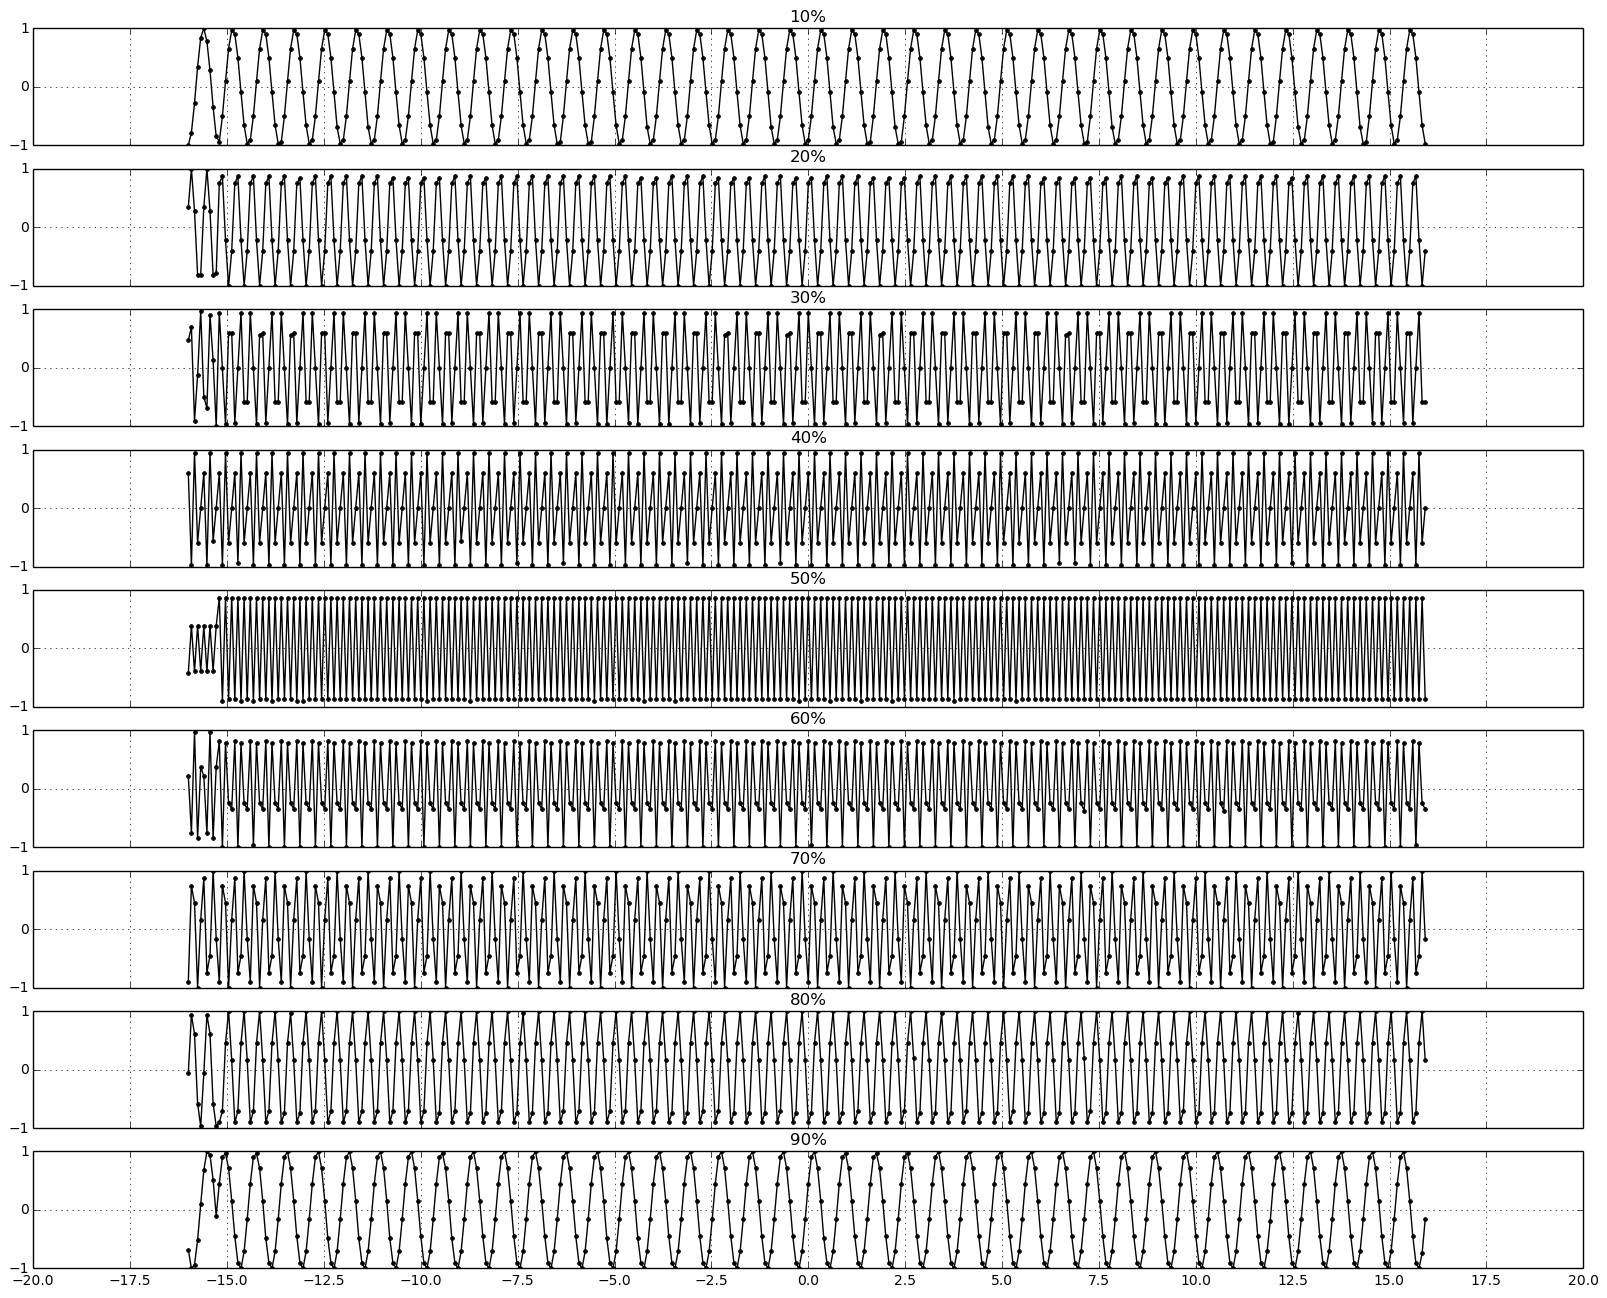

In [13]:
plotSignals(400, vSig, 12.5)

In [14]:
vSamp/2

6.25

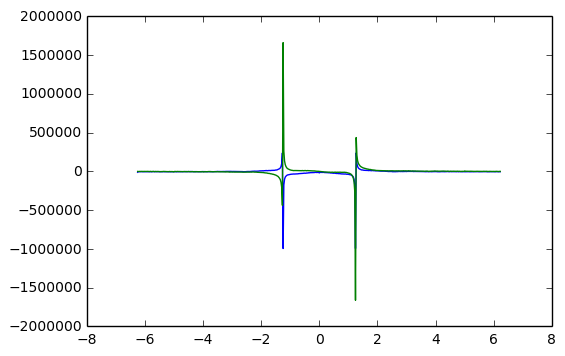

In [15]:
vSamp = 12.5
N = 2**9
freq, vDFT = dft.dft(vSig10[:N], np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N), np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N), vsamp = vSamp )

plt.plot(freq, np.real(vDFT))
plt.plot(freq, np.imag(vDFT))

In [16]:
dft.dft?

In [17]:
def plotAllDFT(N, signal, vSamp):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(9,1, figsize = (20,16))

    for i in range(len(signal)):
        freq, vDFT = dft.dft(vSig[i][:N],time, nu, vsamp = vSamp )
        
        ax[i].plot(freq, np.real(vDFT), 'k.-', label = 'real')
        ax[i].plot(freq, np.imag(vDFT), 'b.-', label = 'imaginary')
        ax[i].set_title('{}0%'.format(i+1))

        
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i].xaxis.set_major_locator(plt.MaxNLocator(18))
        ax[i].grid()  
        ax[i].legend()
    
        if i != 8:
            ax[i].set_xticklabels([])
    


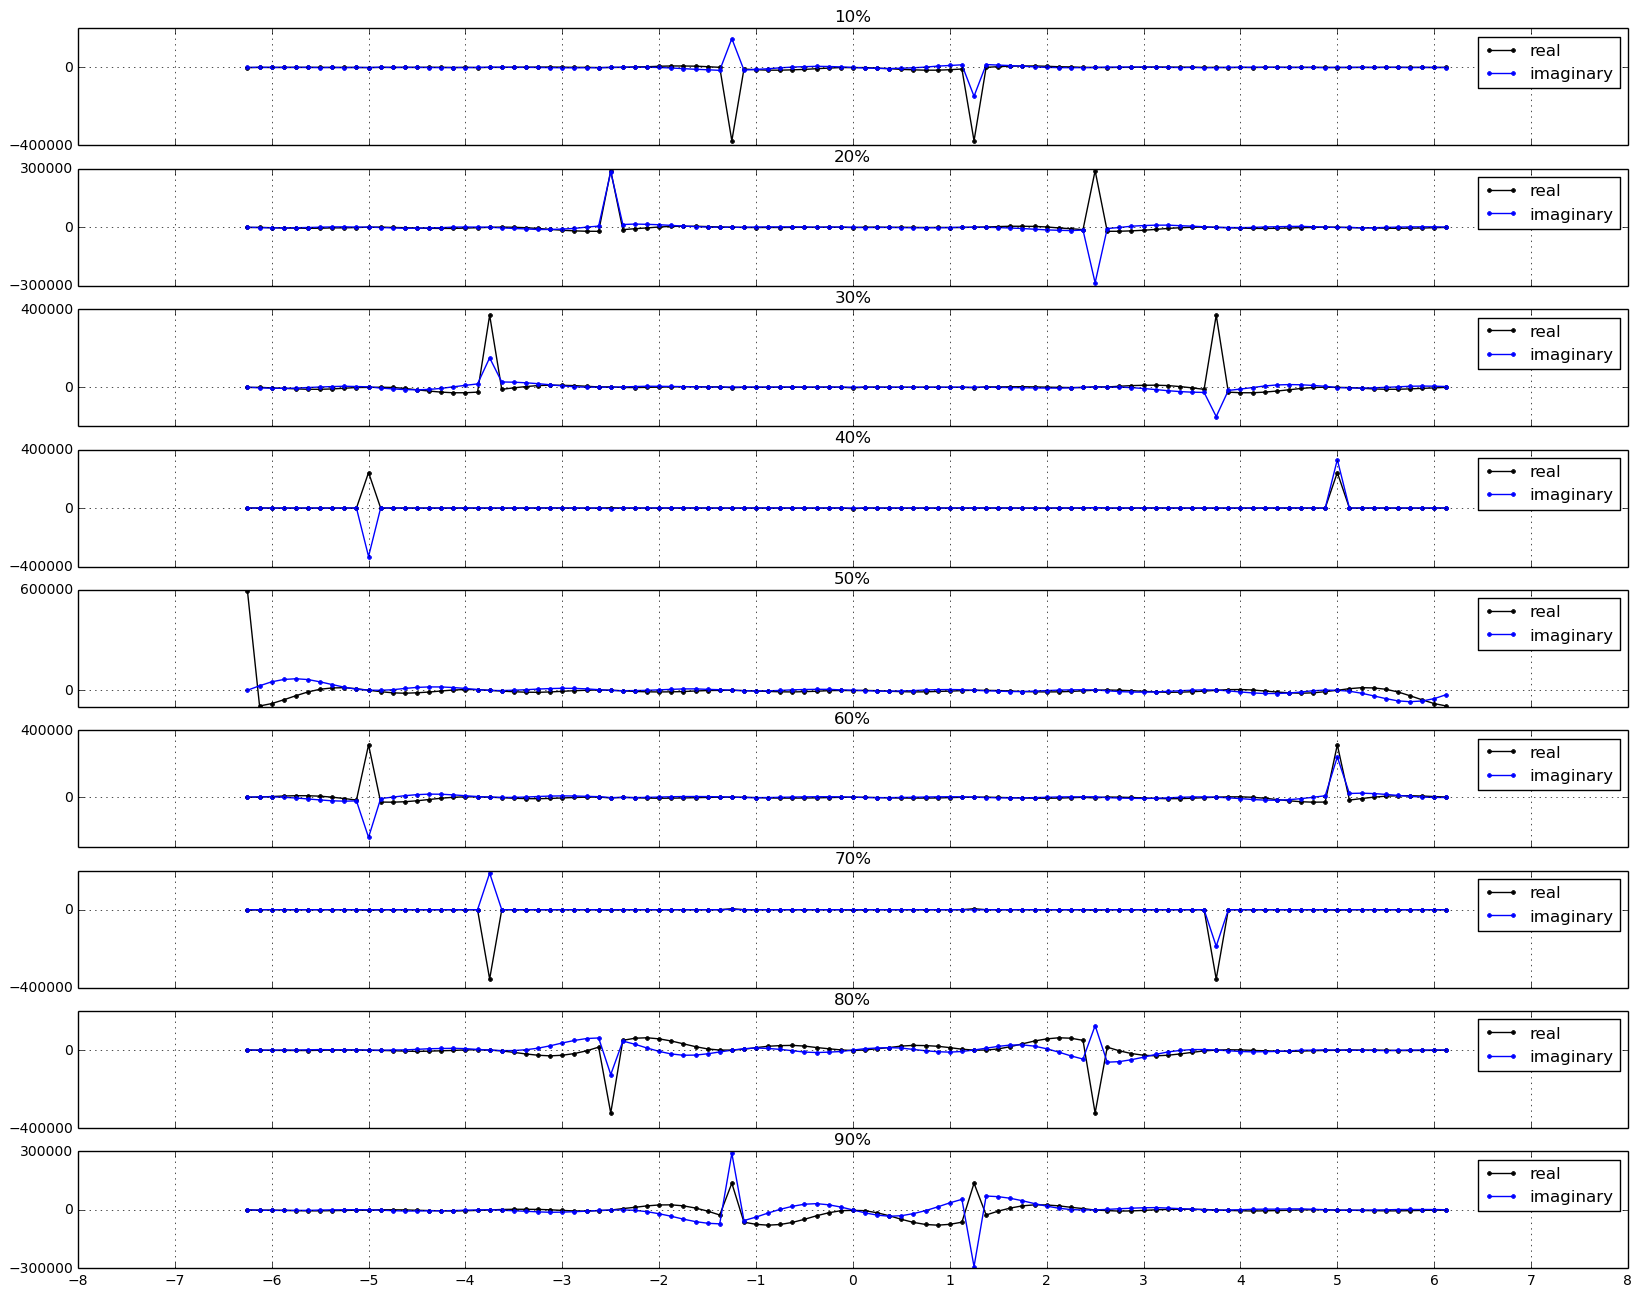

In [18]:
plotAllDFT(100,vSig, vSamp)

In [19]:
def plotPowerSpectrum(signal, vSamp, dataStreamBeg = 0, dataStreamEnd = N):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    N = dataStreamEnd - dataStreamBeg
    
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(9,1, figsize = (20,16))
    
    maxInd = np.zeros(9)

    for i in range(len(signal)):
        
        freq, vDFT = dft.dft(vSig[i][dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )

        power = np.abs(vDFT)**2
        
        maxPower = max(power)
        maxPowerInd = np.argwhere(power == maxPower)
        maxInd[i] = maxPowerInd[0]
        
#         print(power)
#         print(maxPower)
#         print(maxPowerInd)
#         print(np.shape(maxPowerInd))
#         print(maxPowerInd[1,0])
        
        ax[i].plot(freq, power, 'k.-', label = 'max at {}'.format(freq[int(maxInd[i])] ))
        ax[i].set_title('{}0%'.format(i+1))
        ax[i].legend()
        
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i].xaxis.set_major_locator(plt.MaxNLocator(18))
        ax[i].grid()  
    
        if i != 8:
            ax[i].set_xticklabels([])

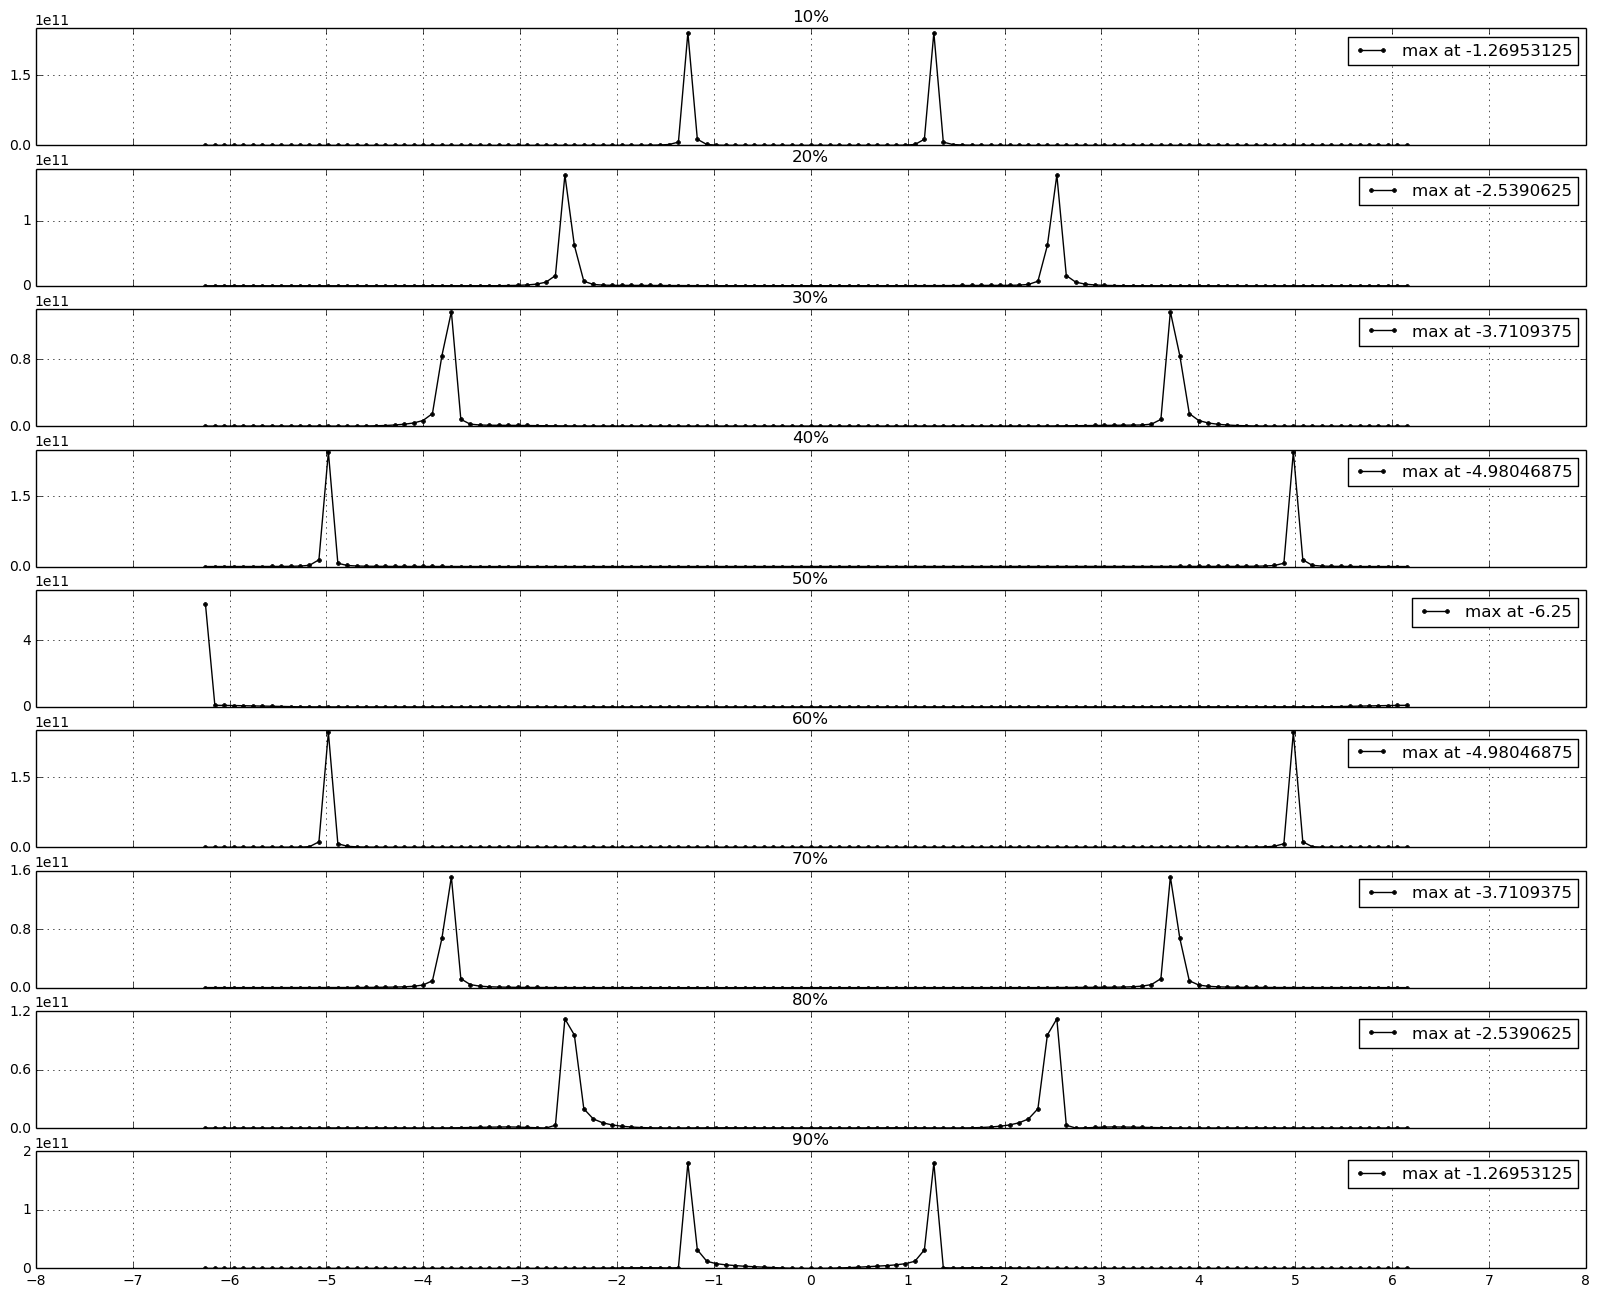

In [20]:
plotPowerSpectrum(vSig, vSamp, dataStreamBeg=0, dataStreamEnd=2**7)